# Steam Video Game Dataset 2025 Cleaning and Analysis

### Step 1 : Overview of the dataset

In [108]:
import pandas as pd
import ast
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

In [73]:
#Import the dataset

df = pd.read_csv("dataset\steam_dataset_2025.csv", encoding="cp1252", sep=';')

In [ ]:
#Small presentation of the dataset

print("="*50)
print("Data Information and Explanation")
print("="*50)
print(f"Total number of games in the dataset: {len(df)}")
print(f"\nColumn names:\n {df.columns.tolist()}")
print(f"\nHead rows from the top:\n")

df.head()

Data Information and Explanation
Total number of games in the dataset: 89618

Column names:
 ['appid', 'name', 'release_date', 'price', 'dlc_count', 'reviews', 'metacritic_score', 'recommendations', 'categories', 'genres', 'positive', 'negative', 'estimated_owners', 'average_playtime_forever', 'average_playtime_2weeks', 'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent']

Head rows from the top:



,appid,name,release_date,price,dlc_count,reviews,metacritic_score,recommendations,categories,genres,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,21/08/2012,0.00,1,NaN,0,4401572,"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free To Play']",...,33189,879,5174,350,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,21/12/2017,0.00,0,NaN,0,1732007,"['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",...,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,09/07/2013,0.00,2,“A modern multiplayer masterpiece.” 9.5/10 – D...,90,14337,"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free To Play']",...,43031,1536,898,892,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,13/04/2015,0.00,0,NaN,96,1803063,"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",...,19323,771,7101,74,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517
4,359550,Tom Clancy's Rainbow Six® Siege,01/12/2015,3.99,9,NaN,0,1165929,"['Single-player', 'Multi-player', 'PvP', 'Onli...",['Action'],...,14204,682,2434,306,89916,"{'FPS': 9831, 'PvP': 9162, 'e-sports': 9072, '...",84,1168020,76,12608


In [ ]:
#Presentation of the data types & values

print("="*50)
print("Data Types and Values")
print("="*50)
df.info()


Data Types and Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89618 entries, 0 to 89617
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     89618 non-null  int64  
 1   name                      89618 non-null  object 
 2   release_date              89618 non-null  object 
 3   price                     89618 non-null  float64
 4   dlc_count                 89618 non-null  int64  
 5   reviews                   10401 non-null  object 
 6   metacritic_score          89618 non-null  int64  
 7   recommendations           89618 non-null  int64  
 8   categories                89618 non-null  object 
 9   genres                    89618 non-null  object 
 10  positive                  89618 non-null  int64  
 11  negative                  89618 non-null  int64  
 12  estimated_owners          89618 non-null  object 
 13  average_playtime_forever  89618 non-nu

**Note:** "release_date" & "estimated_owners" have strange data types. That's because they have str mixed with int. We need to make it unique. 

*Release_date:* 01/02/2015 -> 2015

*Estimated_owners:* 1000 - 3000 -> 2000

In [ ]:
#Check specific amount of missing values

print("=" * 50)
print("Missing Values")
print("=" * 50)
print(df.isnull().sum())


Missing Values
appid                           0
name                            0
release_date                    0
price                           0
dlc_count                       0
reviews                     79217
metacritic_score                0
recommendations                 0
categories                      0
genres                          0
positive                        0
negative                        0
estimated_owners                0
average_playtime_forever        0
average_playtime_2weeks         0
median_playtime_forever         0
median_playtime_2weeks          0
peak_ccu                        0
tags                            0
pct_pos_total                   0
num_reviews_total               0
pct_pos_recent                  0
num_reviews_recent              0
dtype: int64


**Note 2:** A lot of reviews are missing, and a lot of elements are described as 'non-null', but are in fact '0', which can be described as null.

For exampe, Metacritic doesn't usually give 0 score, but there are many 0s in 'metacritic_score'.  It isn't normal that PUBG or Country Strike 2, which are very popular shooting games, have 0. Thus, the information mustn't have been found, and 0 was instead given to indicate a missing value. That is why 0 mustn't be considered bad grades, but rather, skippable grades.

While metacritic_score could have been an interesting category for predictions, there are too many 0s, as indicated in the following cell.

In [32]:
#Example of note 2
#'0' = 96%. We're better off deleting this category, instead of finding the scores.

df['metacritic_score'].value_counts(normalize=True)

metacritic_score
0     0.960421
80    0.002176
81    0.001886
78    0.001819
76    0.001774
        ...   
23    0.000011
20    0.000011
29    0.000011
35    0.000011
30    0.000011
Name: proportion, Length: 69, dtype: float64

In [ ]:
#Presentation of some genres, categories, tags

print("="*50)
print("Examining Key Columns")
print("="*50)

print("\nExample of 'genre' column")
for i in range(min(3, len(df))):
    print(f"Game {i+1}: {df['genres'].iloc[i]}")
    
print("\nExample of 'categories' column (first 3 games):")
for i in range(min(3, len(df))):
    print(f"Game {i+1}: {df['categories'].iloc[i]}")


print("\nExample of 'tags' column (first 3 games):")
for i in range(min(3, len(df))):
    print(f"Game {i+1}: {df['tags'].iloc[i]}") #notice the numbers after the tags. Those are user votes, as tags can be defined by players on Steam.

print("\nExample of 'estimated_owners' column (first 5 games):")
print(df['estimated_owners'].head()) #we are going to change this column and make an average, to avoid having mixed str & int as mentioned above


Examining Key Columns

Example of 'genre' column
Game 1: ['Action', 'Free To Play']
Game 2: ['Action', 'Adventure', 'Massively Multiplayer', 'Free To Play']
Game 3: ['Action', 'Strategy', 'Free To Play']

Example of 'categories' column (first 3 games):
Game 1: ['Multi-player', 'Cross-Platform Multiplayer', 'Steam Trading Cards', 'Steam Workshop', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet', 'Remote Play on TV', 'Steam Timeline']
Game 2: ['Multi-player', 'PvP', 'Online PvP', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet']
Game 3: ['Multi-player', 'Co-op', 'Steam Trading Cards', 'Steam Workshop', 'SteamVR Collectibles', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Steam Timeline']

Example of 'tags' column (first 3 games):
Game 1: {'FPS': 90857, 'Shooter': 65397, 'Multiplayer': 62332, 'Competitive': 53359, 'Action': 47512, 'Team-Based': 46430, 'e-sports': 43533, 'Tactical': 41354, 'First-Person': 39414, 'PvP': 34

In [ ]:
#Checking the stats

print("=" * 50)
print("Basic Stats")
print("=" * 50)
df.describe()


Basic Stats


,appid,price,dlc_count,metacritic_score,recommendations,positive,negative,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
count,8.961800e+04,89618.000000,89618.000000,89618.000000,8.961800e+04,8.961800e+04,8.961800e+04,8.961800e+04,89618.000000,8.961800e+04,89618.000000,8.961800e+04,89618.000000,8.961800e+04,89618.000000,89618.000000
mean,1.656904e+06,7.309623,0.595583,2.903245,1.009401e+03,1.269896e+03,2.098026e+02,1.149119e+02,5.032694,1.147559e+02,5.301814,9.833994e+01,45.352418,1.315490e+03,5.231639,15.584581
std,9.168390e+05,13.331073,15.351920,14.445358,2.204815e+04,3.181441e+04,6.114314e+03,6.814748e+03,181.100334,8.806711e+03,189.591095,5.717544e+03,40.685695,3.542370e+04,22.335358,444.277307
min,2.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,8.550525e+05,0.990000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
50%,1.524730e+06,4.990000,0.000000,0.000000,0.000000e+00,1.000000e+01,2.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,60.000000,1.500000e+01,-1.000000,-1.000000
75%,2.430852e+06,9.990000,0.000000,0.000000,0.000000e+00,5.800000e+01,1.700000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,84.000000,8.100000e+01,-1.000000,-1.000000
max,3.542350e+06,999.980000,3427.000000,97.000000,4.401572e+06,7.480813e+06,1.135108e+06,1.462997e+06,18568.000000,1.462997e+06,18568.000000,1.212356e+06,100.000000,8.632939e+06,100.000000,96473.000000


### Step 2 : Cleaning the dataset and reshaping it

In [74]:
#Choosing the columns to keep

print("=" * 50)
print("Cleaning Data (Keeping Only What We Need)")
print("=" * 50)

columns_to_keep = [
    'name',           # Keeping it for now for reference, will drop it later
    'release_date',   # To convert (XX/XX/XXXX -> XXXX)
    'categories',     # target 1
    'genres',         # target 2 
    'tags',           # target 3, including votes
    'estimated_owners'  # To convert (XXXX - XXXX -> XXXX (average))
]

df = df[columns_to_keep] #df has been reshaped

print(f"We're only keeping the {len(columns_to_keep)} following columns:\n")
print(columns_to_keep)

Cleaning Data (Keeping Only What We Need)
We're only keeping the 6 following columns:

['name', 'release_date', 'categories', 'genres', 'tags', 'estimated_owners']


In [75]:
# Remodelling release_date

df['release_date'] = df['release_date'].str.split(pat="/", expand=True)[2].astype("int64") #fixing the datatype at the same time
df.rename(columns={"release_date":"release_year"}, inplace=True)

#We only keep data after 2015, since that's our main interest for this study
df = df.query("release_year >= 2015") 

print("Successfully converted release_date to release_year, from 2015 to 2025.")
print(f"Current total of games: {len(df)}") #previously 89618

Successfully converted release_date to release_year, from 2015 to 2025.
Current total of games: 86847


In [76]:
# Modify 'estimated_owners' aspect

# Split the column into two separate columns 'owners_low' and 'owners_high'
df[['owners_low', 'owners_high']] = df["estimated_owners"].str.split(" - ", expand=True).astype(int)

# For this training project, while getting an average might not be accurate for the later results, I am simply keeping it clean and simple.
df['total_est_owners'] = ((df['owners_low'] + df['owners_high']) / 2).astype(int)

# Dropping the previous created split columns + original owners column
df = df.drop(['estimated_owners', 'owners_low', 'owners_high'], axis=1)

print("Successfully split estimated_owners, made the average between owners_low and owners_high in the new total_est_owners, then dropped all first three columns.")
print("Successfully created total_est_owners column.")

Successfully split estimated_owners, made the average between owners_low and owners_high in the new total_est_owners, then dropped all first three columns.
Successfully created total_est_owners column.


In [79]:
# Fix categories/genres lists & tags dictionaries
# They are considered strings to Python, but to make analysis, they need to be considered/converted to what they are. Lists, and dictionaries (tags).

def convert(value):
    """Convert list/dictionary string to Python object"""
    try:
        return ast.literal_eval(value) if isinstance(value, str) else value
    except Exception as e:
        # Return empty list for failed conversions
        print(f"Conversion failed. Error : {e}")
        return []

In [80]:
print("=" * 50)
print("Converting Strings To Lists")
print("=" * 50)

df['genres'] = df['genres'].apply(convert)
print("Converted genres to lists")

df['categories'] = df['categories'].apply(convert)
print("Converted categories to lists")

df['tags'] = df['tags'].apply(convert)
print("Converted tags to dictionary")

Converting Strings To Lists
Converted genres to lists
Converted categories to lists
Converted tags to dictionary


In [ ]:
# They are successfully kept as lists and tags as dictionaries
# We have to keep in mind that tags is dtype 'object', but contains int. We will have to split them for later, when we will take votes into account
print(df['genres'].head(1))
print(df['categories'].head(1))
print(df['tags'].head(1))

1    [Action, Adventure, Massively Multiplayer, Fre...
Name: genres, dtype: object
1    [Multi-player, PvP, Online PvP, Stats, Remote ...
Name: categories, dtype: object
1    {'Survival': 14838, 'Shooter': 12727, 'Battle ...
Name: tags, dtype: object


### Step 3 : Updated Data Exploration

In [95]:
print("=" * 50)
print("Understanding the Data")
print("=" * 50)

print(f">> Current total games: {len(df)}")
print(f">> Years: {df['release_year'].min()} to {df['release_year'].max()}")
print(f">> Games per year:")

for year in sorted(df['release_year'].unique()):
    count = len(df[df['release_year'] == year])
    print(f"{year} = {count:} games")

Understanding the Data
>> Current total games: 86847
>> Years: 2015 to 2025
>> Games per year:
2015 = 2521 games
2016 = 4160 games
2017 = 5967 games
2018 = 7443 games
2019 = 6146 games
2020 = 8568 games
2021 = 8294 games
2022 = 9158 games
2023 = 12735 games
2024 = 18282 games
2025 = 3573 games


<Axes: title={'center': 'Amount of games released, per year (2015-2025)'}, xlabel='release_year', ylabel='count'>

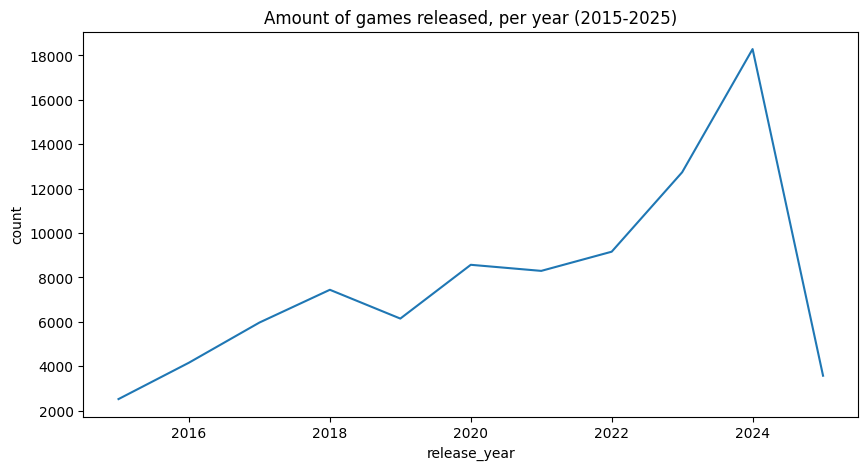

In [ ]:
#Small visualisation to clearly view one of the issues of the dataset
game_years = df['release_year'].value_counts()

plt.figure(figsize=(10,5))
plt.title("Amount of games released, per year (2015-2025)")

sns.lineplot(data=game_years)

**Note 3:** We can clearly see a drop in games after 2024. This is because it's not a complete dataset. 2025 (as of October 2025) is not finished, thus the game library of 2025 is smaller than 2024's. But we want to keep it to see the recent game releases and see the total_est_owners, to see if some games are popular.

Despite that, we can see a large growth of video game releases on the Steam platform. It would be interesting to see by the end of 2025 how the peak that started in 2022 grows.

In [148]:
print("="*50)
print("Most Common Genres")
print("="*50)

all_genres = []
for genre_list in df['genres']:
    if isinstance(genre_list, list):
        all_genres.extend(genre_list)

genre_counts = Counter(all_genres)
print(f"Total amount of unique genres: {len(genre_counts)}\n")

for i, (genre, count) in enumerate(genre_counts.most_common(20), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2}. {genre:20} {count:6} games ({percentage:5.1f}%)")

Most Common Genres
Total amount of unique genres: 33

 1. Indie                 61720 games ( 71.1%)
 2. Casual                38035 games ( 43.8%)
 3. Action                35648 games ( 41.0%)
 4. Adventure             34497 games ( 39.7%)
 5. Simulation            18173 games ( 20.9%)
 6. Strategy              16698 games ( 19.2%)
 7. RPG                   15849 games ( 18.2%)
 8. Early Access           9064 games ( 10.4%)
 9. Free To Play           8753 games ( 10.1%)
10. Sports                 3868 games (  4.5%)
11. Racing                 3198 games (  3.7%)
12. Massively Multiplayer   2067 games (  2.4%)
13. Utilities               826 games (  1.0%)
14. Design & Illustration    476 games (  0.5%)
15. Violent                 427 games (  0.5%)
16. Animation & Modeling    381 games (  0.4%)
17. Education               377 games (  0.4%)
18. Video Production        277 games (  0.3%)
19. Gore                    263 games (  0.3%)
20. Game Development        252 games (  0.3%)


In [149]:
print("="*50)
print("Most Common Categories")
print("="*50)

all_categories = []
for cat_list in df['categories']:
    if isinstance(cat_list, list):
        all_categories.extend(cat_list)

cat_counts = Counter(all_categories)
print(f"Total amount of unique categories: {len(cat_counts)}\n")

for i, (category, count) in enumerate(cat_counts.most_common(20), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2}. {category:30} {count:6} games ({percentage:5.1f}%)")

Most Common Categories
Total amount of unique categories: 40

 1. Single-player                   81772 games ( 94.2%)
 2. Family Sharing                  72481 games ( 83.5%)
 3. Steam Achievements              41350 games ( 47.6%)
 4. Steam Cloud                     21633 games ( 24.9%)
 5. Full controller support         18910 games ( 21.8%)
 6. Multi-player                    15498 games ( 17.8%)
 7. Partial Controller Support      10813 games ( 12.5%)
 8. PvP                             10181 games ( 11.7%)
 9. Steam Trading Cards              9191 games ( 10.6%)
10. Co-op                            8414 games (  9.7%)
11. Online PvP                       7173 games (  8.3%)
12. Steam Leaderboards               7065 games (  8.1%)
13. Remote Play Together             6207 games (  7.1%)
14. Shared/Split Screen              5870 games (  6.8%)
15. Tracked Controller Support       5157 games (  5.9%)
16. Online Co-op                     5114 games (  5.9%)
17. VR Only               

In [ ]:
print("="*50)
print("Most Common Tags (by amount of votes)")
print("="*50)

all_tags_votes = Counter()
for tag_dict in df['tags']:
    if isinstance(tag_dict, dict):
        all_tags_votes.update(tag_dict) #since 'tags' is a dictionary, we are simply updating the values (votes) of the keys (tags)

print(f"Total amount of unique tags: {len(all_tags_votes)}\n")

for i, (tag, total_votes) in enumerate(all_tags_votes.most_common(20), 1):
    print(f"{i:2}. {tag:20} {total_votes:10,} votes")

Most Common Tags (by amount of votes)
Total amount of unique tags: 452

 1. Action                4,032,212 votes
 2. Adventure             3,662,854 votes
 3. Singleplayer          3,521,385 votes
 4. Casual                3,204,922 votes
 5. Indie                 2,709,745 votes
 6. 2D                    2,444,173 votes
 7. Simulation            2,032,878 votes
 8. RPG                   1,979,486 votes
 9. Strategy              1,970,385 votes
10. 3D                    1,937,351 votes
11. Exploration           1,907,796 votes
12. Atmospheric           1,755,333 votes
13. Puzzle                1,557,969 votes
14. Story Rich            1,528,135 votes
15. Colorful              1,526,521 votes
16. First-Person          1,463,036 votes
17. Pixel Graphics        1,425,032 votes
18. Multiplayer           1,407,246 votes
19. Cute                  1,354,643 votes
20. Action-Adventure      1,295,953 votes


### Step 4 : Save Data

In [151]:
print("=" * 50)
print("Saving Cleaned Data")
print("=" * 50)

df.to_csv("dataset/steam_cleaned_dataset.csv", index=False)
print("Successfully saved the new dataset to dataset/steam_cleaned_dataset.csv !")

df.to_pickle("dataset/steam_cleaned_simple.pkl")
print("Successfully saved the new dataset to dataset/steam_cleaned_dataset.pkl !")

Saving Cleaned Data
Successfully saved the new dataset to dataset/steam_cleaned_dataset.csv !
Successfully saved the new dataset to dataset/steam_cleaned_dataset.pkl !


##### Summary

In [154]:
print("The cleaned dataset has:")
print(f">> {len(df)} games")
print(f">> {len(df.columns)} columns: {list(df.columns)}")

The cleaned dataset has:
>> 86847 games
>> 6 columns: ['name', 'release_year', 'categories', 'genres', 'tags', 'total_est_owners']


# Preparing for the Model